In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime, timedelta

In [62]:
df = pd.read_csv('./data/iron_steel_dataset.csv')
df = df[['Date', 'Price']].dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()
d_df

,Date,Price
0,2015-10-29,162.18
1,2015-10-30,162.63
4,2015-11-02,168.59
5,2015-11-03,167.36
6,2015-11-04,163.85
...,...,...
2216,2021-11-22,421.47
2217,2021-11-23,421.13
2218,2021-11-24,411.10
2220,2021-11-26,401.24


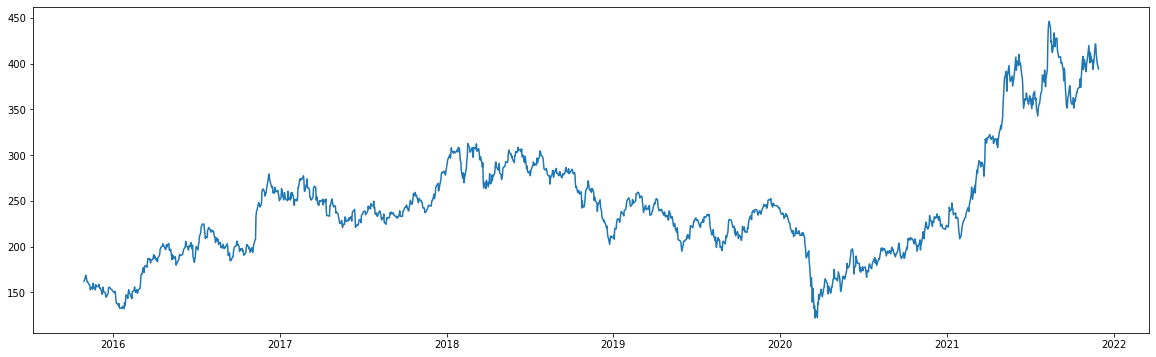

In [63]:
d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [64]:
m = Prophet()
m.fit(d_df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -23.9446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3757.13    0.00858168        749.57      0.3929           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3823.39     0.0316257       1572.38      0.2254           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3847.31     0.0139288       187.888      0.7427      0.7427      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       3849.76   0.000784183       235.746    6.47e-06       0.001      390  LS failed, Hessian reset 
     351       3852.78   7.12352e-05       98.8276   4.845e-07       0.001      472  LS failed, Hessian reset 
     376       3853.68   0.000157356        140.56   2.773e-06       0.001      545  LS failed, Hessian rese

,ds,yhat,yhat_lower,yhat_upper
1617,2022-02-23,490.273577,465.957850,517.347531
1618,2022-02-24,490.864167,466.824519,517.848822
1619,2022-02-25,491.687042,466.159040,514.049099
1620,2022-02-26,504.644500,478.130119,529.999790
1621,2022-02-27,505.061400,481.209662,530.368890


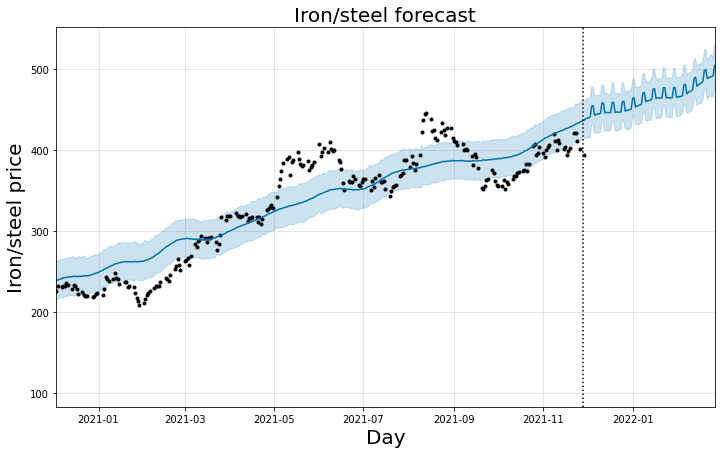

In [65]:
fig1 = m.plot(forecast)
datenow = datetime(2021, 11, 28)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)
plt.xlim([datestart, dateend])
plt.title("Iron/steel forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Iron/steel price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

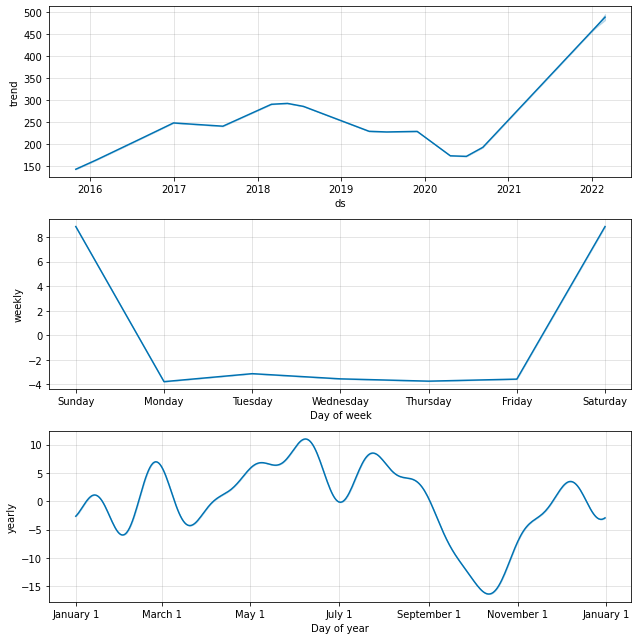

In [66]:
fig2 = m.plot_components(forecast)


In [67]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:prophet:Making 40 forecasts with cutoffs between 2016-11-10 00:00:00 and 2021-08-31 00:00:00
  0%|          | 0/40 [00:00<?, ?it/s]

Initial log joint probability = -3.25432
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        888.68   0.000128002       99.2214           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       888.932   3.22218e-06        81.804           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       888.932   2.52677e-06       87.8875   2.577e-08       0.001      297  LS failed, Hessian reset 
     215       888.932   3.39155e-09       75.6268     0.09777     0.09777      315   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  2%|▎         | 1/40 [00:01<00:53,  1.37s/it]

Initial log joint probability = -3.39653
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       939.469   0.000751871       225.217      0.5513      0.5513      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       944.999   0.000120982       131.801   8.082e-07       0.001      198  LS failed, Hessian reset 
     142       945.407   0.000137773       99.4382   4.751e-07       0.001      251  LS failed, Hessian reset 
     196       947.021   0.000578654       155.981   6.912e-06       0.001      356  LS failed, Hessian reset 
     199       947.206   0.000575305       80.6114           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       947.307   0.000131955       133.632   5.116e-07       0.001      407  LS failed, Hessian reset 
     299       949.987     0.0212174       200.504           1   

  5%|▌         | 2/40 [00:03<01:01,  1.62s/it]

Initial log joint probability = -2.93121
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1009.22     0.0795767       280.115      0.9898      0.9898      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1029.5     0.0341699       246.292      0.2401           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1046.63    0.00123102       133.919           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1049.81    0.00338501        129.72           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     435       1054.78   0.000713444         276.8   2.967e-06       0.001      563  LS failed, Hessian reset 
     499       1056.75    0.00628249    

  8%|▊         | 3/40 [00:04<00:55,  1.49s/it]

Initial log joint probability = -2.95309
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1047.14     0.0237303       759.206      0.2989      0.9677      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1075.7    0.00421616       509.531           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       1077.89   0.000111718       124.522   6.576e-07       0.001      313  LS failed, Hessian reset 
     281       1084.96   0.000672859        811.04   7.475e-07       0.001      402  LS failed, Hessian reset 
     299       1091.01    0.00845477        244.12           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1094.17    0.00118559       97.3182           1           1      537   
    Iter      log pro

 10%|█         | 4/40 [00:05<00:52,  1.46s/it]

Initial log joint probability = -3.55957
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1141.37    0.00533719       524.909      0.6196      0.6196      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1158.67     0.0469234       737.677           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1160.45   0.000907375       292.318   5.842e-06       0.001      296  LS failed, Hessian reset 
     299       1169.81   0.000453859       311.157       0.416       0.416      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1175.33    0.00803578       101.628      0.6534           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       1175.36   0.000620157    

 12%|█▎        | 5/40 [00:07<00:53,  1.52s/it]

Initial log joint probability = -3.92065
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1226.93     0.0132826        126.32      0.9839      0.9839      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       1242.33   6.48097e-05       67.5746   5.772e-07       0.001      260  LS failed, Hessian reset 
     199       1243.74    0.00222939       96.6813           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       1247.47   8.42479e-05       88.1998   6.022e-07       0.001      392  LS failed, Hessian reset 
     299       1250.54    0.00156553       110.007           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1256.67    0.00327153       108.573      0.8653      0.8653      578   
    Iter      log pro

 15%|█▌        | 6/40 [00:09<00:51,  1.52s/it]

Initial log joint probability = -3.71855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1311.65     0.0152864       296.049      0.9773      0.9773      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       1317.86   0.000149624       128.607   4.009e-07       0.001      205  LS failed, Hessian reset 
     159       1318.75    0.00017685       160.566   1.803e-06       0.001      271  LS failed, Hessian reset 
     199       1319.91    0.00182551       296.895      0.3393      0.3393      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       1324.55     0.0005014       251.103   5.357e-06       0.001      400  LS failed, Hessian reset 
     249       1327.25   0.000160051       134.619    2.76e-06       0.001      474  LS failed, Hessian reset 
     299       1330.16    0.00221065       99.8161           1   

 18%|█▊        | 7/40 [00:10<00:50,  1.52s/it]

Initial log joint probability = -4.27367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1371.61     0.0245569       282.092           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1394.86    0.00821322        449.19      0.1572           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1410.15     0.0394766       208.339       1.626      0.1626      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1417.79    0.00229674       275.382      0.5651      0.5651      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     416       1419.48   0.000198923       228.093   3.965e-07       0.001      541  LS failed, Hessian reset 
     499       1422.26    0.00149703    

 20%|██        | 8/40 [00:12<00:48,  1.53s/it]

Initial log joint probability = -3.71317
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1451.3    0.00679092       203.062           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       1479.99   0.000379431       207.744   4.201e-06       0.001      255  LS failed, Hessian reset 
     199       1481.18     0.0135235       601.451           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       1485.32   0.000336437       200.408   3.305e-06       0.001      337  LS failed, Hessian reset 
     299       1493.53    0.00540652       418.125           1           1      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1508.43    0.00414167       80.6131      0.2767           1      572   
    Iter      log pro

 22%|██▎       | 9/40 [00:13<00:47,  1.55s/it]

Initial log joint probability = -3.65723
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1488.21     0.0286796       676.328           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1506.52    0.00827492       260.573      0.7724      0.7724      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       1507.16   0.000380351       331.618   1.906e-06       0.001      283  LS failed, Hessian reset 
     299       1511.74   0.000978372       170.252      0.4457      0.4457      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       1512.78   0.000146432       149.387   1.483e-06       0.001      468  LS failed, Hessian reset 
     356        1513.8    9.1844e-05       108.346   1.081e-06       0.001      541  LS failed, Hessian rese

 25%|██▌       | 10/40 [00:15<00:44,  1.49s/it]

Initial log joint probability = -3.3685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1571.69     0.0493426       299.001           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1607.96    0.00303188       459.205     0.02253           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       1614.29   8.76502e-05       110.774   7.147e-07       0.001      312  LS failed, Hessian reset 
     292       1619.03   0.000127699       127.577   4.604e-07       0.001      429  LS failed, Hessian reset 
     299       1619.56    0.00373566       749.953      0.3875      0.3875      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       1620.55   0.000130704       136.935   1.622e-06       0.001      503  LS failed, Hessian reset

 28%|██▊       | 11/40 [00:16<00:46,  1.62s/it]

Initial log joint probability = -3.36953
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1644.01    0.00602545       285.082      0.9495      0.9495      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1670.99     0.0164377       422.887      0.9592      0.9592      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1684.69    0.00399615       126.347           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1693.11     0.0415671       302.325           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     401       1693.18   0.000202337       218.661   5.799e-07       0.001      524  LS failed, Hessian reset 
     499       1702.42     0.0281717    

 30%|███       | 12/40 [00:18<00:43,  1.56s/it]

Initial log joint probability = -3.44056
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1691.38     0.0494376       1323.55       0.608           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1735.65    0.00739153       243.611           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1752.45    0.00521279       103.537           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1760.67   0.000136514       140.509      0.3574      0.3574      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1764.24     0.0111965        539.61           1           1      599   
    Iter      log prob        ||dx||      ||grad||       alpha  

 32%|███▎      | 13/40 [00:19<00:41,  1.52s/it]

Initial log joint probability = -3.41158
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1769.95     0.0195087       200.588           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118        1774.7   0.000339635       235.366   1.932e-06       0.001      180  LS failed, Hessian reset 
     161       1783.17   0.000140942       107.775   1.348e-06       0.001      268  LS failed, Hessian reset 
     199       1785.55    0.00108513       158.109      0.4406      0.4406      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       1791.94   0.000163711       105.429   6.271e-07       0.001      376  LS failed, Hessian reset 
     275       1799.38   0.000739576       94.0684   8.831e-06       0.001      479  LS failed, Hessian reset 
     299       1800.67    0.00954757       137.547           1   

 35%|███▌      | 14/40 [00:21<00:38,  1.50s/it]

Initial log joint probability = -3.82403
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1859.24    0.00455485       395.956      0.2153       0.668      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1892.2    0.00509594       303.427      0.2352      0.2352      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1897.08    0.00135771       184.876      0.6299      0.6299      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1908.91    0.00601822       191.186           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     494       1916.73   0.000142926       132.205   4.997e-07       0.001      651  LS failed, Hessian reset 
     499       1916.97    0.00124252    

 38%|███▊      | 15/40 [00:22<00:36,  1.44s/it]

Initial log joint probability = -4.48713
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1950.04     0.0109212       416.985      0.7987      0.7987      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1972.01    0.00371548       306.861      0.6267      0.6267      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       1982.02   0.000458082       230.264   5.189e-07       0.001      386  LS failed, Hessian reset 
     299       1983.09    0.00190215       305.363      0.2268      0.8203      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       1987.14    9.7963e-05       104.364   9.442e-07       0.001      557  LS failed, Hessian reset 
     399        1987.3   0.000110331        88.698      0.7782      0.7782      573   
    Iter      log pro

 40%|████      | 16/40 [00:24<00:36,  1.51s/it]

Initial log joint probability = -7.6869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2006.65    0.00857935       967.638        0.53        0.53      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       2040.01   0.000202888       193.992   1.136e-06       0.001      273  LS failed, Hessian reset 
     199       2041.31    0.00132017       276.499           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       2044.37   0.000258252       243.958   9.065e-07       0.001      362  LS failed, Hessian reset 
     299       2050.16    0.00255292       325.965    0.004398           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2057.94    0.00335954       490.528     0.04411      0.8048      568   
    Iter      log prob

 42%|████▎     | 17/40 [00:25<00:36,  1.57s/it]

Initial log joint probability = -13.1736
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2018.62     0.0120234       273.299           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2037.77    0.00409594       179.236           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       2039.55   0.000119872        97.047   7.736e-07       0.001      307  LS failed, Hessian reset 
     299       2043.96     0.0065223       149.427      0.6404           1      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       2048.39   0.000508875       338.226   6.518e-07       0.001      487  LS failed, Hessian reset 
     399       2052.26    0.00046674        161.38      0.6332      0.6332      546   
    Iter      log pro

 45%|████▌     | 18/40 [00:27<00:33,  1.53s/it]

Initial log joint probability = -10.4062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2044.15     0.0548453       806.695           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       2063.45   0.000143517       124.187   1.213e-06       0.001      265  LS failed, Hessian reset 
     199       2064.63    0.00063792       80.9243      0.2186           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2067.58   0.000606578       287.183   2.874e-06       0.001      366  LS failed, Hessian reset 
     299       2072.25    0.00259064       161.335           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2079.47    0.00634294       110.726           1           1      566   
    Iter      log pro

 48%|████▊     | 19/40 [00:28<00:32,  1.53s/it]

Initial log joint probability = -11.4149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2140.76     0.0115181        248.18           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2155.14     0.0073549       179.933      0.4366       0.977      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       2163.91    0.00137039        248.52   5.041e-06       0.001      403  LS failed, Hessian reset 
     299       2165.19   0.000918555       111.979           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2168.05    0.00395918       125.906      0.6548      0.6548      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     419       2170.55   0.000148177    

 50%|█████     | 20/40 [00:30<00:29,  1.50s/it]

Initial log joint probability = -13.0869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2214.31     0.0301559       555.535           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2233.88    0.00958813       489.553      0.6706      0.6706      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2235.31   0.000282338       138.634   3.827e-06       0.001      275  LS failed, Hessian reset 
     261       2241.22   0.000185487       142.768   1.507e-06       0.001      411  LS failed, Hessian reset 
     299        2245.4    0.00173141       135.994      0.3957           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2255.49    0.00217124       206.657      0.5773      0.5773      588   
    Iter      log pro

 52%|█████▎    | 21/40 [00:31<00:27,  1.46s/it]

Initial log joint probability = -18.4565
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2303.7     0.0247923       764.117           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2329.38     0.0143234       130.387           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       2334.58   0.000327603       317.341   8.689e-07       0.001      326  LS failed, Hessian reset 
     269       2339.63   9.40166e-09       195.091   7.494e-07           1      379   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


 55%|█████▌    | 22/40 [00:33<00:25,  1.41s/it]

Initial log joint probability = -13.8856
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2369.09   0.000334087       620.563       0.191       0.191      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2388.19    0.00180869       166.158           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2398.7   0.000136688       67.9234           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       2407.77   0.000187371       175.515   1.432e-06       0.001      452  LS failed, Hessian reset 
     399       2414.23    0.00261605       187.613      0.1964           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2416.81    0.00166347    

 57%|█████▊    | 23/40 [00:34<00:24,  1.44s/it]

Initial log joint probability = -15.6964
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2454.22      0.022368       335.711      0.9779      0.9779      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2483.21    0.00440294       335.777           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2492.27   0.000460325        178.28      0.4765      0.4765      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       2492.93    0.00012773       132.331   8.811e-07       0.001      400  LS failed, Hessian reset 
     329       2493.49   0.000192438       136.797   1.867e-06       0.001      459  LS failed, Hessian reset 
     399       2497.36    0.00966029       390.555      0.9551      0.9551      549   
    Iter      log pro

 60%|██████    | 24/40 [00:36<00:23,  1.45s/it]

Initial log joint probability = -16.2251
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2539.27     0.0188404       898.077      0.3169           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2566.8     0.0845726       226.077           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       2570.82   0.000147416       142.872   1.194e-06       0.001      289  LS failed, Hessian reset 
     299       2579.53      0.002053       158.533           1           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2587.11   0.000315473       64.1156      0.1799           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436       2588.11   0.000226244    

 62%|██████▎   | 25/40 [00:37<00:22,  1.53s/it]

Initial log joint probability = -12.9126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2612.88     0.0362568        516.31           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2636.97    0.00129675       95.1868           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2652.81    0.00130503       398.487      0.5126      0.5126      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       2654.87   0.000233014       183.584   2.963e-06       0.001      429  LS failed, Hessian reset 
     399       2661.31    0.00175412       300.882      0.3149      0.7582      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2667.86   0.000136319    

 65%|██████▌   | 26/40 [00:39<00:22,  1.59s/it]

Initial log joint probability = -19.0119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2693.07    0.00924747       387.021           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2714.75    0.00062406       143.787           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2728.91     0.0113579        411.62           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2733.13   0.000710879       109.045           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     457       2737.14   0.000115113       131.781   1.103e-06       0.001      595  LS failed, Hessian reset 
     499       2740.23    0.00208152    

 68%|██████▊   | 27/40 [00:41<00:21,  1.63s/it]

Initial log joint probability = -42.1173
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2695.75      0.012811       227.891           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2724.27    0.00825642       183.373           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2730.41   0.000657767       140.766      0.3519      0.3519      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2739.65     0.0122961        133.69      0.2391           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     433       2743.12   8.08289e-05        83.183   1.075e-06       0.001      584  LS failed, Hessian reset 
     499       2744.39    0.00075997    

 70%|███████   | 28/40 [00:42<00:19,  1.62s/it]

Initial log joint probability = -42.6049
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2588.96     0.0207158       421.725      0.3881      0.3881      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2620.26    0.00429049       245.951           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229        2621.6   0.000694985        174.56   3.953e-06       0.001      315  LS failed, Hessian reset 
     299       2626.49    0.00494816       175.993       0.754       0.754      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       2629.56    0.00024388       151.699   2.631e-06       0.001      527  LS failed, Hessian reset 
     399       2629.67   9.58494e-05       66.0882      0.5935      0.5935      550   
    Iter      log pro

 72%|███████▎  | 29/40 [00:44<00:19,  1.76s/it]

Initial log joint probability = -27.4383
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2662.23     0.0301945       182.398           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       2687.73   0.000125022       80.5792   9.306e-07       0.001      266  LS failed, Hessian reset 
     199       2690.73     0.0011414        151.08      0.6446      0.6446      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       2697.21   0.000733194       260.197   5.823e-06       0.001      418  LS failed, Hessian reset 
     299       2699.35    0.00577713       130.275           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       2699.74   0.000127948       85.7336   9.315e-07       0.001      490  LS failed, Hessian rese

 75%|███████▌  | 30/40 [00:46<00:17,  1.76s/it]

Initial log joint probability = -32.0735
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2764.57     0.0101139        221.14           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2790.5     0.0125676       363.398           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2800.26    0.00126404       86.3695      0.7741      0.7741      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       2803.58   0.000493336       181.277   7.026e-06       0.001      492  LS failed, Hessian reset 
     399       2805.17     0.0125151       278.834           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     425       2806.14   0.000203149    

 78%|███████▊  | 31/40 [00:48<00:15,  1.70s/it]

Initial log joint probability = -27.5513
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2814.16    0.00496122       552.517      0.4523      0.4523      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2834.45   0.000588702       93.4618      0.8773      0.8773      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       2837.35   0.000140089       102.023   9.237e-07       0.001      347  LS failed, Hessian reset 
     266       2837.94   0.000193314       119.146   2.542e-06       0.001      407  LS failed, Hessian reset 
     299       2838.07    0.00135152       54.0764      0.9118      0.9118      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       2843.22   0.000186081       123.849   8.113e-07       0.001      518  LS failed, Hessian rese

 80%|████████  | 32/40 [00:49<00:13,  1.67s/it]

Initial log joint probability = -26.1458
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2855.56     0.0199382       135.688           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       2868.67   0.000207461       93.5093   7.337e-07       0.001      181  LS failed, Hessian reset 
     199       2883.58     0.0152687       166.531           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       2883.66   0.000208858       133.976   1.396e-06       0.001      335  LS failed, Hessian reset 
     299       2891.63   0.000139083       73.6404           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       2897.51   0.000263101       153.715   2.082e-06       0.001      633  LS failed, Hessian rese

 82%|████████▎ | 33/40 [00:51<00:11,  1.62s/it]

Initial log joint probability = -21.3018
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2882.77    0.00285064       243.901      0.9094      0.9094      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2911.91     0.0192354       510.122           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2930.4    0.00644659       225.557           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2939.5    0.00124873        125.73      0.3281           1      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2942.69   2.40259e-06        68.483      0.2439      0.2439      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

 85%|████████▌ | 34/40 [00:52<00:09,  1.62s/it]

Initial log joint probability = -21.2382
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2939.75      0.010865        359.11      0.1556           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2965.73    0.00441731       164.905           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2982.54    0.00184562       76.5104           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2987.67     0.0178699       110.091       0.485       0.485      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     401       2987.86   0.000284878       184.986   2.207e-06       0.001      513  LS failed, Hessian reset 
     448       2989.84   0.000166575    

 88%|████████▊ | 35/40 [00:54<00:07,  1.56s/it]

Initial log joint probability = -19.9756
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3013.1     0.0194349       714.529      0.8676      0.8676      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3062.14   0.000855644       183.597      0.1093      0.1093      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       3071.89   0.000192175       111.138    6.77e-07       0.001      336  LS failed, Hessian reset 
     299       3077.67   9.66174e-05       68.5918      0.6175      0.6175      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       3078.74    0.00030148       225.765   9.446e-07       0.001      472  LS failed, Hessian reset 
     399       3081.33     0.0172216       107.794           1           1      576   
    Iter      log pro

 90%|█████████ | 36/40 [00:55<00:06,  1.59s/it]

Initial log joint probability = -25.2422
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2981.54     0.0154428       578.541      0.3543           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3092.37    0.00270348       224.119      0.3638           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3118.87     0.0172289       522.891           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373       3129.01   0.000188511       176.684   8.556e-07       0.001      474  LS failed, Hessian reset 
     399       3134.27     0.0040409       84.5157      0.8279      0.8279      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3139.03   0.000552644    

 92%|█████████▎| 37/40 [00:57<00:04,  1.62s/it]

Initial log joint probability = -33.5803
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3241.13     0.0206912       469.367           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3376.34      0.228365       4043.08           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3413.42   0.000941814       106.232           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       3418.45   0.000447537       326.746   2.263e-06       0.001      453  LS failed, Hessian reset 
     399        3421.1    0.00282815       548.033           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3430.43    0.00663589    

 95%|█████████▌| 38/40 [00:59<00:03,  1.79s/it]

Initial log joint probability = -21.0818
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3299.42     0.0143477       791.912           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3448.03    0.00677076       183.547           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3479.83    0.00749141       203.565           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     379       3486.86    0.00010629       137.956    6.92e-07       0.001      502  LS failed, Hessian reset 
     399       3489.35    0.00234797       272.099           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3497.3     0.0189224    

 98%|█████████▊| 39/40 [01:01<00:01,  1.84s/it]

Initial log joint probability = -32.0125
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3548.86     0.0380345       802.812           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3673.86     0.0183711       822.286           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3698.51    0.00364063       300.416           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3712.08   0.000520406       240.093        0.63        0.63      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3725.42    0.00160738       141.012      0.9403      0.9403      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

100%|██████████| 40/40 [01:04<00:00,  1.60s/it]


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,925.242729,30.417803,23.406495,0.099412,0.071488,0.097736,0.391273
1,10 days,943.493135,30.716333,23.503965,0.101102,0.074969,0.098784,0.398474
2,11 days,990.978677,31.479814,23.876321,0.103970,0.075714,0.101244,0.404378
3,12 days,1035.054051,32.172256,24.578297,0.105476,0.077886,0.103588,0.397465
4,13 days,1065.300588,32.638943,25.211516,0.107185,0.080410,0.105936,0.375864


/usr/local/lib/python3.9/site-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.9/site-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


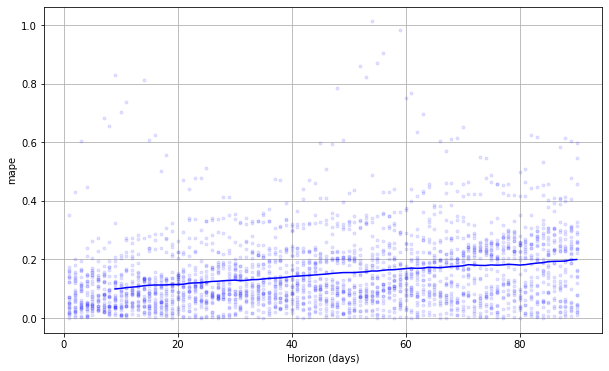

In [68]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')